In [34]:
# Imports 
import numpy as np 
import pandas as pd
from IPython.display import display

In [35]:
# Load
file_path = '/Users/nickblackford/Desktop/Python/als_data.csv'
df = pd.read_csv(file_path)

In [36]:
# Preview df
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [37]:
# Temporarily display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df)

# Reset to default (optional)
pd.reset_option('display.max_columns')

        ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        1        65         57.0            40.5         38.0       0.066202   
1        2        48         45.0            41.0         39.0       0.010453   
2        3        38         50.0            47.0         45.0       0.008929   
3        4        63         47.0            44.0         41.0       0.012111   
4        5        63         47.0            45.5         42.0       0.008292   
...    ...       ...          ...             ...          ...            ...   
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.018476   

      ALSFRS_slope  ALSFRS_

In [38]:
# Remove any data that is not relevant to the patient’s ALS condition
df = df.drop(columns=['ID'])

In [39]:
# Apply standard scaler 
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=10)
    y_kmeans = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, y_kmeans)
    silhouette_scores.append(score)
    
# Print silhouette scores for debugging
for k, score in zip(cluster_range, silhouette_scores):
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

Number of clusters: 2, Silhouette Score: 0.0779489418382482
Number of clusters: 3, Silhouette Score: 0.06792675217846486
Number of clusters: 4, Silhouette Score: 0.06867177357095701
Number of clusters: 5, Silhouette Score: 0.05740976392457452
Number of clusters: 6, Silhouette Score: 0.06256617707910656
Number of clusters: 7, Silhouette Score: 0.051075921419424526
Number of clusters: 8, Silhouette Score: 0.04735394077311848
Number of clusters: 9, Silhouette Score: 0.050075176240459866
Number of clusters: 10, Silhouette Score: 0.04016513650091586


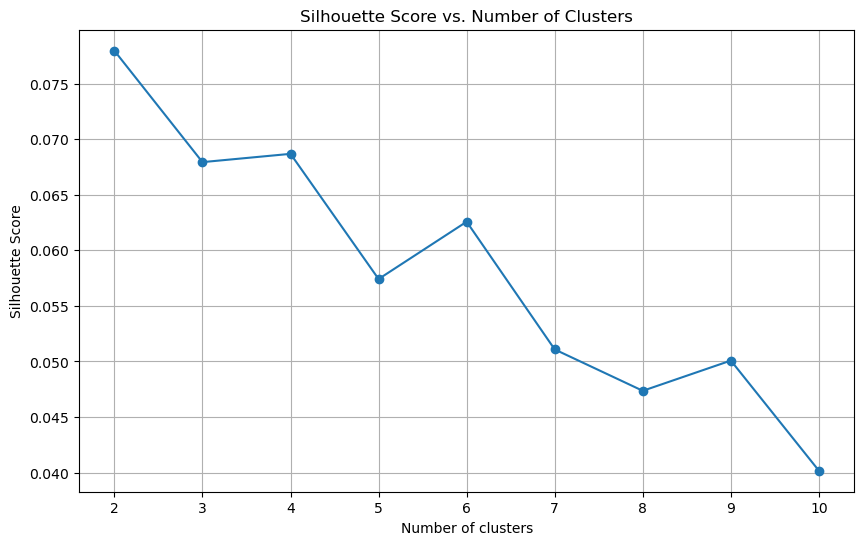

In [41]:
# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

Analyzing the Silhouette Score vs. Number of clusters plot, we are going to select 4 as an optimal number of clusters. 4 clusters has the second highest silhouette score only to 2. Given the data we are working with, selecting 4 clusters as opposed to 2 will likely give us more insights when conducting analysis on ALS patients. 

In [48]:
# Create and fit the K-means model
kmeans = KMeans(n_clusters=4, n_init=10, random_state=10)
kmeans.fit(X_scaled)

# Predict the clusters for the data points
df['Cluster'] = kmeans.labels_

In [49]:
from sklearn.decomposition import PCA

# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Create a df with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = df['Cluster']

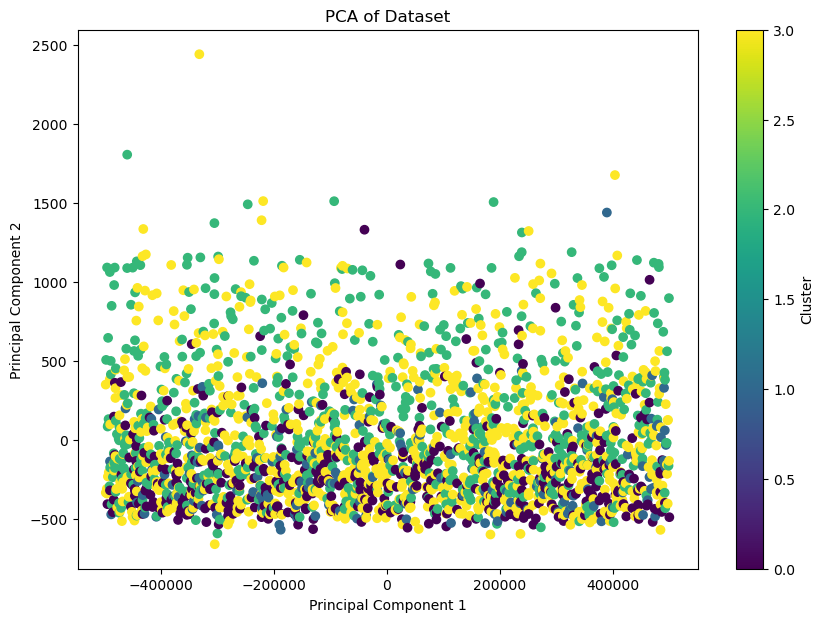

In [50]:
# Make a scatterplot of the PCA transformed data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(scatter, label='Cluster')
plt.show()

## Conclusion

### Objective
The goal of this analysis was to cluster ALS (Amyotrophic Lateral Sclerosis) patient health metrics using K-means clustering and evaluate the clustering performance to gain insights into potential patterns or subgroups within the patient population.

### Steps Taken
1. **Data Preparation**:
   - Loaded the dataset containing 100 different health metrics for ALS patients.
   - Scaled the data to standardize the features, ensuring each feature contributes equally to the clustering process.

2. **Optimal Number of Clusters**:
   - Utilized the Silhouette Score to determine the optimal number of clusters.
   - The Silhouette Score indicated that 4 clusters provided the highest sihlouette score second to 2 clusters, suggesting a well-defined clustering structure.

3. **K-means Clustering**:
   - Fitted the K-means model with 4 clusters.
   - Assigned cluster labels to each data point (patient).

4. **PCA Transformation and Visualization**:
   - Applied PCA to reduce the dimensionality of the data to two principal components.
   - Created a scatter plot to visualize the clustering results, coloring each point by its cluster label.

### Conclusion
Based on the clustering analysis and performance evaluation, we can draw the following conclusions:

1. **Distinct Subgroups**:
   - The analysis identified four distinct subgroups within the ALS patient population based on the 100 health metrics.
   - This suggests that there may be underlying patterns or characteristics that differentiate these four groups, which could be related to disease progression, response to treatment, or other health-related factors.

2. **Clinical Implications**:
   - These subgroups could potentially inform clinical decisions, such as tailoring treatment plans to specific patient profiles or identifying patients who may benefit from more intensive monitoring.
   - Further analysis is needed to understand the specific health metrics that contribute most significantly to the clustering, which could highlight critical factors in ALS management.

3. **Future Research**:
   - This preliminary clustering analysis provides a foundation for more detailed studies. Future research could involve investigating the specific characteristics of each cluster, exploring correlations with clinical outcomes, and validating the findings with larger datasets.
   - Additionally, integrating other data sources (e.g., genetic data, lifestyle factors) could provide a more comprehensive understanding of the patient subgroups.

4. **Limitations**:
   - The current analysis is exploratory and should be interpreted with caution. The clustering results depend on the selected features and the scaling method used.